In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import pi
%matplotlib inline

In [3]:
def spiderplot(categories, values, title):
    # categories = ['danceability','instrumentalness','speechiness','acousticness', 'valence']
    N = len(categories)

    # We are going to plot the first line of the data frame.
    # But we need to repeat the first value to close the circular graph:
    values = values.flatten().tolist()
    values += values[:1]
    values
    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(111, polar=True)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([0.25,0.5,0.75,1.0], ["0.25","0.5","0.75","1.0"], color="grey", size=7)
    plt.ylim(0,0.5)

    # Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')
    ax.set_title(title)
    # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)

In [17]:
df = pd.read_json('data_with_lyrics.json')
df.head()

,added_at,name,artist,artist_id,genres,uri,lyrics,audio_features
0,2020-06-22 19:21:14+00:00,Black Holes (Solid Ground),The Blue Stones,5VPCIIfZPK8KPsgz4jmOEC,"modern alternative rock,modern blues rock,mode...",spotify:track:6JsiDFQRx7GHcuf2UroSYB,Broken down so I walk the line I drown my woun...,"[{'danceability': 0.559, 'energy': 0.845, 'key..."
1,2020-06-22 19:20:54+00:00,Won't Go Down Easy,JAXSON GAMBLE,4fClmcYOLFAp5rrKUqLHAI,rebel blues,spotify:track:2dQLffulyZHoOxcvSeYCZ4,,"[{'danceability': 0.644, 'energy': 0.758, 'key..."
2,2020-06-22 19:19:49+00:00,Never Meant to Be,Welshly Arms,1xKrH6GSh9CJh8nYwbqW7B,"modern alternative rock,modern hard rock,moder...",spotify:track:3NHyQ388Ac1VieCVVBFJOU,Draw back your shades Don't miss-behave Open u...,"[{'danceability': 0.47600000000000003, 'energy..."
3,2020-06-22 19:18:42+00:00,Devil Devil,MILCK,62lirbb6qJs4VOGpdCNHK8,la pop,spotify:track:7K0aHJFgffrUKH8Z3IE8a4,"Devil, devil Clever devil devil How quickly th...","[{'danceability': 0.539, 'energy': 0.389, 'key..."
4,2020-06-22 19:18:05+00:00,Jungle - The MADE Edit,X Ambassadors,3NPpFNZtSTHheNBaWC82rB,"modern alternative rock,modern rock,pop,pop ro...",spotify:track:6dAIC2Hqes5KXEap8ADXEo,,"[{'danceability': 0.40700000000000003, 'energy..."


In [18]:
df_audio = df.apply(lambda x: pd.Series(x['audio_features'][0]), axis=1)
df_audio = df_audio[['danceability','instrumentalness','speechiness','acousticness', 'valence', 'loudness','energy']]
df = df.join(df_audio)
df = df.drop('audio_features', axis=1)
df.head()


,added_at,name,artist,artist_id,genres,uri,lyrics,danceability,instrumentalness,speechiness,acousticness,valence,loudness,energy
0,2020-06-22 19:21:14+00:00,Black Holes (Solid Ground),The Blue Stones,5VPCIIfZPK8KPsgz4jmOEC,"modern alternative rock,modern blues rock,mode...",spotify:track:6JsiDFQRx7GHcuf2UroSYB,Broken down so I walk the line I drown my woun...,0.559,0.000037,0.0362,0.007570,0.262,-4.236,0.845
1,2020-06-22 19:20:54+00:00,Won't Go Down Easy,JAXSON GAMBLE,4fClmcYOLFAp5rrKUqLHAI,rebel blues,spotify:track:2dQLffulyZHoOxcvSeYCZ4,,0.644,0.000008,0.0683,0.008820,0.671,-6.081,0.758
2,2020-06-22 19:19:49+00:00,Never Meant to Be,Welshly Arms,1xKrH6GSh9CJh8nYwbqW7B,"modern alternative rock,modern hard rock,moder...",spotify:track:3NHyQ388Ac1VieCVVBFJOU,Draw back your shades Don't miss-behave Open u...,0.476,0.000000,0.0499,0.009170,0.439,-5.031,0.849
3,2020-06-22 19:18:42+00:00,Devil Devil,MILCK,62lirbb6qJs4VOGpdCNHK8,la pop,spotify:track:7K0aHJFgffrUKH8Z3IE8a4,"Devil, devil Clever devil devil How quickly th...",0.539,0.000064,0.0897,0.164000,0.281,-9.911,0.389
4,2020-06-22 19:18:05+00:00,Jungle - The MADE Edit,X Ambassadors,3NPpFNZtSTHheNBaWC82rB,"modern alternative rock,modern rock,pop,pop ro...",spotify:track:6dAIC2Hqes5KXEap8ADXEo,,0.407,0.205000,0.0926,0.000086,0.110,-5.556,0.868


In [23]:
df[(df['energy'] > 0.8) & (df['valence'] > 0.8)].head().drop('lyrics', axis=1)

,added_at,name,artist,artist_id,genres,uri,danceability,instrumentalness,speechiness,acousticness,valence,loudness,energy
23,2020-05-22 15:40:07+00:00,A Little Bit Off,Five Finger Death Punch,5t28BP42x2axFnqOOMg3CM,"alternative metal,groove metal,nu metal,post-g...",spotify:track:6GqqGv8frU7kqzXkm2rewI,0.664,0.000000,0.0404,0.00839,0.820,-6.053,0.828
150,2019-05-17 06:48:25+00:00,White Lies - EP Version,Max Frost,7r8xR0LmnaAM623MmRDn1V,"austindie,indie pop,indie poptimism,indietroni...",spotify:track:6sS0cYdBJCjTW9pgitwsCk,0.695,0.000000,0.0441,0.15300,0.969,-3.429,0.878
212,2018-11-25 09:19:15+00:00,Get up and Fight,Muse,12Chz98pHFMPJEknJQMWvI,"modern rock,permanent wave,post-grunge,rock",spotify:track:7lvZfms8Bh8QnThBmFTD7a,0.646,0.000014,0.0356,0.00430,0.870,-5.654,0.846
218,2018-11-25 09:19:15+00:00,Pressure (feat. UCLA Bruin Marching Band),Muse,12Chz98pHFMPJEknJQMWvI,"modern rock,permanent wave,post-grunge,rock",spotify:track:1DqoQsvOtn23gDx6Up6cX5,0.631,0.000046,0.0551,0.49600,0.807,-2.656,0.947
235,2018-10-30 07:43:58+00:00,Body Talks (feat. Kesha),The Struts,3lDpdwM8KILepMHqBWUhIA,"glam rock,modern alternative rock,modern rock",spotify:track:6lsniCxgY5bSJLKrhX1qSN,0.537,0.000000,0.2620,0.00628,0.848,-3.439,0.919


In [24]:
mean_audio_feature_year = df.groupby(df['added_at'].dt.year).agg(['mean'])
mean_audio_feature_year

,danceability,instrumentalness,speechiness,acousticness,valence,loudness,energy
,mean,mean,mean,mean,mean,mean,mean
added_at,,,,,,,
2014,0.455583,0.115916,0.086256,0.183211,0.287926,-9.111109,0.655072
2015,0.458054,0.051940,0.067189,0.041197,0.415687,-5.225339,0.846379
2016,0.447454,0.119549,0.064983,0.046745,0.378760,-5.369720,0.837145
2017,0.466131,0.079110,0.065788,0.045420,0.380760,-5.749069,0.815115
2018,0.480916,0.073268,0.067740,0.081456,0.379687,-5.718181,0.786094
2019,0.496411,0.112275,0.059315,0.112497,0.373829,-6.288841,0.753841
2020,0.514036,0.066226,0.055189,0.124963,0.403061,-6.746083,0.716167


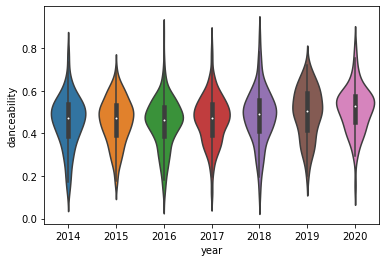

In [25]:
df['year'] = df['added_at'].dt.year
sns.violinplot(data=df, x ='year', y='danceability')

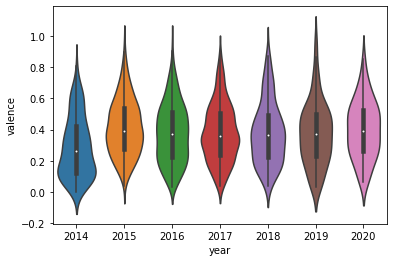

In [26]:
sns.violinplot(data=df, x ='year', y='valence')